In [1]:
library(data.table)
library(stringr)
library(pheatmap)
library(ape)
library(ggplot2)
library(Rtsne)
library(sva)
library(VennDiagram)
library(readxl)
library(energy)
library(MASS)
library(quantreg)
library(limma)
library(Glimma)
library(edgeR)
library(RColorBrewer)
library(minerva)
library(dbscan)
library(amap)
library(NbClust)
library(apeglm)
library(gplots)
library(colorspace)
library(dendextend)
library(data.table)
library(topGO)
library(treemap)
library(factoextra)
library(ggrepel)
library(dplyr)
library(plyr)
library(cowplot)
library(colorRamps)
library(VennDiagram)

Loading required package: mgcv
Loading required package: nlme
This is mgcv 1.8-31. For overview type 'help("mgcv-package")'.
Loading required package: genefilter
Loading required package: BiocParallel
Loading required package: grid
Loading required package: futile.logger

Attaching package: ‘futile.logger’

The following object is masked from ‘package:mgcv’:

    scat


Attaching package: ‘VennDiagram’

The following object is masked from ‘package:ape’:

    rotate


Attaching package: ‘MASS’

The following object is masked from ‘package:genefilter’:

    area

Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve


Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess


---------------------
Welcome to dendextend version 1.13.4
Type citation('dendextend') for how to cite the package.

Type browseVignettes(package = 'dendextend') for the package vignette.
The github pag

In [2]:
color_AD <- "#FF3300"
color_ND <- "blue"
color_CHC <- "#FFCC00"

In [3]:
default_color <- c("#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7")

color_long_list <- c(default_color, '#C1272D', '#0000A7', '#EECC16', '#008176', '#B3B3B3', '#7E6148B2')

In [4]:
setwd("~/ownCloud/Meng/")

In [5]:
High_quality_protein_intensity_matrix <- read.table('R_workstation/100_plus_proteomic_DATA/High_quality_protein_intensity_matrix.tsv', header =TRUE,
                                                    stringsAsFactors=F, sep = "\t")
dim(High_quality_protein_intensity_matrix)

[1] 3448  191

In [6]:
ANOVA_lm_test_res <- read.table('100_plus_results/sig_protein_list/ANOVA_lm_test_results.tsv', 
                                 header =TRUE, stringsAsFactors=F, sep = "\t")

In [7]:
Braak_proteins_472 <- read.table('100_plus_results/sig_protein_list/Braak_stage_related_proteins_472.tsv', 
                                 header =TRUE, stringsAsFactors=F, sep = "\t")

In [8]:
Braak_proteins_472

protein,gene,p_value_ANOVA,adj.p_value_ANOVA,effect_size_ANOVA,effect_size_lm,p_value_lm,adj.p_value_lm
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SYT12,SYT12,5.836626e-23,1.006234e-19,-1.1722376,-0.23924445,6.009909e-43,2.072217e-39
RPH3A,RPH3A,1.917868e-21,2.204269e-18,-1.5517087,-0.29806800,1.169479e-34,1.008091e-31
VGF,VGF,6.463818e-21,4.457449e-18,-2.2915211,-0.40605566,6.460878e-28,8.568118e-26
NDUFS3,NDUFS3,3.222281e-20,1.587204e-17,-0.5922395,-0.11366440,3.815273e-31,1.461673e-28
PDK3,PDK3,4.040558e-20,1.741481e-17,-0.8372619,-0.15445328,6.004327e-29,1.217819e-26
NDUFA12,NDUFA12,1.512614e-19,4.741358e-17,-0.5736917,-0.10887039,3.883245e-28,6.086103e-26
OLFM1,OLFM1,2.064424e-19,5.931778e-17,-1.0588640,-0.21413105,1.115892e-29,2.748283e-27
SLC25A11,SLC25A11,2.588178e-19,6.864643e-17,-0.5302484,-0.09835495,5.587740e-34,3.211088e-31
ACTN2;ACTN3,ACTN2,4.595280e-19,1.131752e-16,-1.2511038,-0.23509752,1.988611e-30,5.274409e-28


In [9]:
load("Temp_results/Age_related_proteins_sig174.Rdata")

In [10]:
Age_related_proteins_sig174

,effect_size,p_value,adjusted_p_value,protein
,<dbl>,<dbl>,<dbl>,<chr>
SLC12A2,-0.016475472,6.647424e-08,2.292032e-04,SLC12A2
CARNS1,-0.030593665,1.316565e-05,4.539516e-02,CARNS1
MAP1B,-0.007200298,5.612407e-07,1.935158e-03,MAP1B
SLC16A1,-0.012967449,6.828580e-07,2.354494e-03,SLC16A1
IRGQ,-0.012766274,4.190605e-07,1.444921e-03,IRGQ
MTHFD1,0.005406671,8.151689e-06,2.810702e-02,MTHFD1
HSPA12A,-0.005648299,8.591300e-07,2.962280e-03,HSPA12A
FLOT1,0.006989682,5.530881e-06,1.907048e-02,FLOT1
KBTBD11,0.004197253,9.647289e-06,3.326385e-02,KBTBD11


In [11]:
Age_sig_proteins <- Age_related_proteins_sig174$protein

In [12]:
load(file="Temp_results/Braak_2tests_results.Rdata")

In [13]:
Braak_2tests_sig472 <- subset(Braak_2tests, in_top20 == "yes")

In [14]:
Braak_2tests_sig472

,ANOVA_p_value,ANOVA_adjusted_p_value,ANOVA_effect_size,lm_effect_size,lm_p_value,lm_adjusted_p_value,in_top20
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
CASKIN1,3.981658e-14,1.430079e-12,-0.5876160,-0.10123382,1.069147e-21,2.972919e-20,yes
STIP1,2.347769e-08,1.530266e-07,1.6115302,0.28172617,8.287425e-17,1.009719e-15,yes
SYT12,5.836626e-23,1.006234e-19,-1.1722376,-0.23924445,6.009909e-43,2.072217e-39,yes
GRHPR,5.865249e-09,4.425247e-08,1.3230533,0.23555239,6.613055e-16,6.994422e-15,yes
BASP1,2.859927e-07,1.458732e-06,0.8253689,0.04440916,1.025208e-01,1.366944e-01,yes
DPYSL2,5.338907e-08,3.190209e-07,1.1512438,0.21547280,1.448779e-16,1.693353e-15,yes
FBXO41,8.425100e-09,6.115736e-08,-0.5275719,-0.11140086,7.940012e-11,3.922230e-10,yes
IRGQ,9.721749e-12,1.544728e-10,-0.7382583,-0.13651462,2.873240e-19,5.269645e-18,yes
DPYSL3,1.559117e-10,1.739753e-09,1.4713474,0.27161076,5.501910e-20,1.200670e-18,yes


In [15]:
Braak_sig_proteins <- rownames(Braak_2tests_sig472)

In [16]:
aging_protective_test_sig108 <- read.table(file = "100_plus_results/Sig_results_from_analysis/CEN-specific Age-related proteins (lm_t_test)-20220731.tsv", 
                                           sep = '\t', header = TRUE)

In [17]:
aging_protective_test_sig108

protein,uniprot_accessions,gene,HUGO_gene,cell_type_marker,cluster,F.p,R_square,p.value,FDR,adj.p_value_B,age_interval,estimate_CHC_age,age_younger
<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
CARNS1,A5YM72;A5YM72-5;A5YM72-3;A5YM72-4,CARNS1,CARNS1,Oligodendrocytes,3,0.0055191600,0.12457819,3.204508e-05,1.429704e-04,5.575845e-03,83-92,89.00000,14.05865
MAP1B,P46821,MAP1B,MAP1B,,4,0.0987713985,0.03395283,2.443786e-03,6.158833e-03,4.252188e-01,82-91,87.55000,15.48975
IRGQ,Q8WZA9,IRGQ,IRGQ,,2,0.0006374232,0.19061836,9.396848e-04,2.771274e-03,1.635052e-01,82-91,87.55000,15.47230
SHANK2,E7EUA2;Q9UPX8-4;A6NHU9;A0A0A0MSQ6;Q9UPX8;Q9UPX8-3;H7C1X5,SHANK2,SHANK2,,2,0.0156901079,0.09167664,2.686351e-02,4.485587e-02,1.000000e+00,87-96,90.91667,12.12958
HADHA,P40939,HADHA,HADHA,,2,0.0485374849,0.05599918,4.015698e-03,8.844702e-03,6.987314e-01,83-92,89.00000,14.03548
RPS6KA2;RPS6KA3,F2Z2J1;Q15349-2;Q15349-3;Q15349;B7Z3B5;P51812,RPS6KA2,RPS6KA2,,1,0.0033455204,0.14016940,2.477691e-03,6.158833e-03,4.311183e-01,84-93,89.58333,13.47733
CIT,O14578-3;H7BYJ3;O14578;O14578-4,CIT,CIT,,1,0.0034836056,0.13891507,1.499490e-06,1.534773e-05,2.609113e-04,70-79,75.00000,28.02754
RPS3,P23396;P23396-2;E9PPU1;E9PL09;F2Z2S8;H0YCJ7;H0YF32;H0YEU2,RPS3,RPS3,,2,0.0483930849,0.05609271,2.822497e-03,6.821034e-03,4.911144e-01,70-79,75.00000,28.01838
TPD52L1,Q16890-4;Q16890-3;Q16890-2;E9PNK6;Q16890-5;E9PPQ1;Q16890;J3KNE7;E9PNQ9,TPD52L1,TPD52L1,Astrocytes,1,0.0016591379,0.16175139,4.145861e-08,1.528898e-06,7.213798e-06,82-91,87.55000,15.49825


In [18]:
age_diff <- read.table("100_plus_results/Age_differ_for_174_protein.tsv", header = TRUE)

In [19]:
summary(subset(age_diff, !(protein %in% aging_protective_test_sig108$protein))$younger)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  10.86   10.86   11.34   12.69   13.21   22.54 

In [20]:
metadata <- read_excel("100_plus_project/Metadata/2019_07_23_Proteomics_Metadata_forMeng_v3.xlsx",
                       sheet=1,col_names=TRUE, na="NA")
metadata <- as.data.frame(metadata)
#colnames(metadata)

names_sample <- as.array(colnames(High_quality_protein_intensity_matrix)[2:ncol(High_quality_protein_intensity_matrix)])
names_sample <- as.vector(apply(names_sample, 1, function(names){return (str_sub(names, 11))}))

filenames_map_index <- integer(length(names_sample))
for (i in 1:length(names_sample)){
    if ((names_sample[i] %in% metadata[,"Mass-Spec filenames (1)"]) | 
        (names_sample[i] %in% metadata[,"Mass-Spec filenames (2)"]))
        filenames_map_index[i] <- ifelse(length(which(metadata[,"Mass-Spec filenames (1)"] == names_sample[i]))==0,
                                     which(metadata[,"Mass-Spec filenames (2)"] == names_sample[i]), 
                                     which(metadata[,"Mass-Spec filenames (1)"] == names_sample[i]))
    else
        print("ERROR, file name not in metadata!")
}

#print(filenames_map_index)

metadata <- metadata[filenames_map_index, ][c("nbb", "autopsy...3", "sex", "age", "weight", "GROUP...17", "pmd", "braak", "amyloid", "apoe")]
colnames(metadata) <- c("nbb", "autopsy", "sex", "age", "weight", "GROUP", "pmd", "braak", "amyloid", "apoe")
metadata$filenames <- names_sample

metadata$sex[(metadata$sex=='F') | (metadata$sex=='f')] <- "F"
metadata$sex[(metadata$sex=='M') | (metadata$sex=='m')] <- "M"
metadata$braak <- as.numeric(metadata$braak)
metadata$age <- as.numeric(metadata$age)


index_AD <- which(metadata$GROUP == "AD")
index_CHC <- which(metadata$GROUP == "CHC")
index_ND <- which(metadata$GROUP == "ND")
num_AD <- length(index_AD)
num_CHC <- length(index_CHC)
num_ND <- length(index_ND)

metadata[which((metadata$GROUP=="ND") & (is.na(metadata$braak))),]$braak <- median(metadata[index_ND,]$braak, na.rm = TRUE)
metadata[which((metadata$GROUP=="CHC") & (is.na(metadata$braak))),]$braak <- median(metadata[index_CHC,]$braak, na.rm = TRUE)

metadata$fBraak <- metadata$braak
metadata[which(metadata$braak == 0), ]$fBraak <- 1

metadata$cBraak <- as.numeric(lapply(metadata$braak, function(braak){if (braak==0 | braak==1 | braak==2)
                                                                return(1)
                                                          if (braak==3 | braak==4)
                                                                return(2)
                                                          if (braak==5 | braak==6)
                                                                return(3)}))

#metadata[which((metadata$GROUP=="AD") & (is.na(metadata$amyloid))),]$amyloid <- 'C'
#metadata[which((metadata$GROUP=="ND") & (is.na(metadata$amyloid))),]$amyloid <- 'A'
#metadata[which((metadata$GROUP=="CHC") & (is.na(metadata$amyloid))),]$amyloid <- 'B'


get_mod <- function(apoe){
    apoe_count <- as.matrix(table(apoe))
    return (rownames(apoe_count)[which.max(apoe_count)])
}

#metadata[which((metadata$GROUP=="AD") & (is.na(metadata$apoe))),]$apoe <- get_mod(metadata[index_AD,]$apoe)
metadata[which((metadata$GROUP=="ND") & (is.na(metadata$apoe))),]$apoe <- get_mod(metadata[index_ND,]$apoe)
#metadata[which((metadata$GROUP=="CHC") & (is.na(metadata$apoe))),]$apoe <- get_mod(metadata[index_CHC,]$apoe)

metadata$apoe_OR <- as.numeric(metadata$apoe)

metadata[which((metadata$apoe == 22)|(metadata$apoe == 23)|(metadata$apoe == 32)),]$apoe_OR <- 0.6
metadata[which((metadata$apoe == 24)|(metadata$apoe == 42)),]$apoe_OR <- 2.6
metadata[which(metadata$apoe == 33),]$apoe_OR <- 1
metadata[which((metadata$apoe == 34)|(metadata$apoe == 43)),]$apoe_OR <- 3.2
metadata[which(metadata$apoe == 44),]$apoe_OR <- 14.9

convert_time_2_numeric <- function(pmd){
    if (is.na(pmd))
        return (NA)
    else
        return (as.numeric(str_sub(pmd, start=1, end=2))+as.numeric(str_sub(pmd, 4))/60)
}

metadata$pmd_numeric <- apply(metadata["pmd"], 1, convert_time_2_numeric)
metadata[which(is.na(metadata$pmd_numeric)),]$pmd_numeric <- median(metadata$pmd_numeric, na.rm = TRUE)

New names:
• `autopsy` -> `autopsy...3`
• `GROUP` -> `GROUP...4`
• `Snumber` -> `Snumber...8`
• `Snumber` -> `Snumber...16`
• `GROUP` -> `GROUP...17`
• `tissuecode` -> `tissuecode...19`
• `autopsy` -> `autopsy...22`
• `tissuecode` -> `tissuecode...35`
• `` -> `...51`

In [21]:
cal_sample_batch_index <- function(sample_names){
    sample_index <- apply(as.data.frame(sample_names), 1, str_sub, -3)
    for (i in 1:length(sample_index)){
        sample_index[i] <- gsub("_", "0", sample_index[i])
    }
    sample_index <- as.numeric(sample_index)
    sample_index <- (sample_index - 1) %/% 8
    extra_batch <- max(sample_index, na.rm=TRUE) + 1
    sample_index[is.na(sample_index)] <- extra_batch
    return(sample_index)
}

protein_intensity_combat <- ComBat(dat=log2(as.matrix(High_quality_protein_intensity_matrix[,-1])), 
                                     batch=cal_sample_batch_index(metadata$filenames), mod=NULL, par.prior=TRUE, prior.plots=FALSE)
rownames(protein_intensity_combat) <- High_quality_protein_intensity_matrix$protein

Warning message in cal_sample_batch_index(metadata$filenames):
“NAs introduced by coercion”Found29batches
Adjusting for0covariate(s) or covariate level(s)


Standardizing Data across genes


Fitting L/S model and finding priors
Finding parametric adjustments
Adjusting the Data



In [22]:
cal_median_for_stage <- function(protein_intens, braak){
    intens <- numeric(0)
    for(i in sort(unique(braak))){
        intens <- c(intens, median(protein_intens[which(braak == i)]))
    }
    return(intens)
}

cal_mean_for_stage <- function(protein_intens, braak){
    intens <- numeric(0)
    for(i in sort(unique(braak))){
        intens <- c(intens, mean(protein_intens[which(braak == i)]))
    }
    return(intens)
}


In [23]:
generate_Braak_protein_df <- function(protein_list, protein_disp){
    
    protein_index <- sapply(protein_list, 
                            function(x){return(which(rownames(protein_intensity_combat) == x))})
    if(length(protein_index) != 1)
        exps_at_stage <- as.data.frame(t(apply(protein_intensity_combat[protein_index, ][, -index_CHC], 1,
                                           cal_mean_for_stage, metadata[-index_CHC, ]$fBraak)))
    else 
        exps_at_stage <- as.data.frame(t(cal_mean_for_stage(as.numeric(protein_intensity_combat[protein_index, ][-index_CHC]),
                                                              metadata[-index_CHC, ]$fBraak)))
    
    exps_at_stage <- 2 ^ exps_at_stage
    exps_at_stage_NDAD <- exps_at_stage
    exps_at_stage <- exps_at_stage / exps_at_stage[, 1]
    
    order_idx <- order(exps_at_stage[, 6], decreasing = TRUE)
    
    braak  <- sort(unique(metadata[-index_CHC, ]$fBraak))
    #braak  <- sort(unique(metadata$fBraak))
    intens <- as.vector(t(exps_at_stage))    
    protein <- rep(protein_disp, each = ncol(exps_at_stage))
    is_sig <- NULL
    #is_sig_alpha <- NULL
    #is_sig_linet <- NULL
    #
    #for(i in protein_list){
    #    protein <- c(protein, rep(protein_disp[i], ncol(exps_at_stage)))
    #    if (i %in% Braak_sig_proteins){
    #        is_sig <- c(is_sig, rep("yes", ncol(exps_at_stage)))
    #        is_sig_alpha <- c(is_sig_alpha, 1)
    #        is_sig_linet <- c(is_sig_linet, 1)
    #    }else{
    #        is_sig <- c(is_sig, rep("no", ncol(exps_at_stage)))
    #        is_sig_alpha <- c(is_sig_alpha, 0.3)
    #        is_sig_linet <- c(is_sig_linet, 3)
    #    }
    #}
    
    #print(protein)
    
    braak <- rep(braak, nrow(exps_at_stage))
    
    plot_df <- data.frame(protein = protein,
                          intens = intens,
                          braak = braak#,
                          #alpha = is_sig
                         )
    
    plot_df$protein <- factor(plot_df$protein, levels = protein_disp[order_idx])
    
    ylim1 <- min(plot_df$intens)
    ylim2 <- max(plot_df$intens)
    
    return(list(plot_df = plot_df, 
                exps_at_stage_NDAD = exps_at_stage_NDAD,
                order_idx = order_idx, 
                #is_sig_alpha = is_sig_alpha, 
                #is_sig_linet = is_sig_linet, 
                ylim1 = ylim1, ylim2 = ylim2))
}


#Our transformation function
scaleFUN <- function(x) sprintf("%.1f", x)

make_Braak_plot <- function(protein_list, title, plot_df, order_idx, is_sig_linet, is_sig_alpha, ylim1, ylim2){
    p <- ggplot(plot_df, aes(x = braak, y = intens)) +
        geom_line(aes(color = protein)) + #linetype = protein, alpha = protein, color = protein)) +
        geom_point(aes(color = protein)) + #alpha = protein, color = protein)) +
        xlab("Braak stage") + 
        ylab("Protein abundance ratio") +
        ggtitle("ND&AD groups") +
        scale_x_continuous(breaks=seq(1,6,1), labels = c("0/I", "II", "III", "IV", "V", "VI")) +
        scale_y_continuous(limits = c(ylim1, ylim2), labels=scaleFUN) + 
        #scale_linetype_manual(name = "", breaks = as.factor(protein_list[order_idx]),
        #                      values = is_sig_linet[order_idx],
        #                      labels = protein_list[order_idx]) +
    
        scale_color_manual(name = "", breaks = as.factor(protein_list[order_idx]),
                              values = colorRampPalette(brewer.pal(9, "Set1"))(length(protein_list)),
                              labels = protein_list[order_idx]) +
    
        #scale_alpha_manual(name = "", breaks = as.factor(protein_list[order_idx]),
        #                      values = is_sig_alpha[order_idx],
        #                      labels = protein_list[order_idx]) +
    
        #guides(alpha = FALSE) +
    
        geom_hline(yintercept=1)+
        
        theme(#plot.background = element_rect(),    # Background of the entire plot
            panel.background = element_rect(fill = "white"),   # Background of plotting area
            panel.border = element_rect(colour = "black", fill=NA, size=1), 
            panel.grid = element_line(),         # All grid lines
            legend.key=element_rect(fill='white', colour = "gray", size = 0.1),
            legend.key.size = unit(0.5, 'cm'), #change legend key size
            legend.key.height = unit(0.5, 'cm'), #change legend key height
            legend.key.width = unit(0.5, 'cm'),
            legend.text = element_text(size = 8, color = "black"),
            plot.margin = ggplot2::margin(0, 0, 0.3, 0, "cm")
        )
            
    
    return(p)
}

In [24]:
generate_Braak_protein_CHCdf <- function(protein_list, protein_disp, exps_at_stage_NDAD){
    
    protein_index <- sapply(protein_list, 
                            function(x){return(which(rownames(protein_intensity_combat) == x))})
    if(length(protein_index) != 1)
        exps_at_stage <- as.data.frame(t(apply(protein_intensity_combat[protein_index, ][, index_CHC], 1,
                                           cal_mean_for_stage, metadata[index_CHC, ]$fBraak)))
    else 
        exps_at_stage <- as.data.frame(t(cal_mean_for_stage(as.numeric(protein_intensity_combat[protein_index, ][index_CHC]),
                                                              metadata[index_CHC, ]$fBraak)))
    
    exps_at_stage <- 2 ^ exps_at_stage
    exps_at_stage <- exps_at_stage / exps_at_stage_NDAD[, 1]
    
    order_idx <- order(exps_at_stage[, ncol(exps_at_stage)], decreasing = TRUE)
    
    braak  <- sort(unique(metadata[index_CHC, ]$fBraak))
    #braak  <- sort(unique(metadata$fBraak))
    intens <- as.vector(t(exps_at_stage))    
    protein <- rep(protein_disp, each = ncol(exps_at_stage))
    is_sig <- NULL
    #is_sig_alpha <- NULL
    #is_sig_linet <- NULL
    #for(i in protein_list){
    #    protein <- c(protein, rep(protein_disp[i], ncol(exps_at_stage)))
    #    if (i %in% Braak_sig_proteins){
    #        is_sig <- c(is_sig, rep("yes", ncol(exps_at_stage)))
    #        is_sig_alpha <- c(is_sig_alpha, 1)
    #        is_sig_linet <- c(is_sig_linet, 1)
    #    }else{
    #        is_sig <- c(is_sig, rep("no", ncol(exps_at_stage)))
    #        is_sig_alpha <- c(is_sig_alpha, 0.3)
    #        is_sig_linet <- c(is_sig_linet, 3)
    #    }
    #}
    
    braak <- rep(braak, nrow(exps_at_stage))
    
    plot_df <- data.frame(protein = protein,
                          intens = intens,
                          braak = braak#,
                          #alpha = is_sig
                         )
    
    plot_df$protein <- factor(plot_df$protein, levels = protein_disp[order_idx])
    
    ylim1 <- min(plot_df$intens)
    ylim2 <- max(plot_df$intens)
    
    return(list(plot_df = plot_df, 
                order_idx = order_idx, 
                #is_sig_alpha = is_sig_alpha, 
                #is_sig_linet = is_sig_linet, 
                ylim1 = ylim1, ylim2 = ylim2))
}

make_Braak_CHCplot <- function(protein_list, title, plot_df, order_idx, is_sig_linet, is_sig_alpha, ylim1, ylim2){
    p <- ggplot(plot_df, aes(x = braak, y = intens)) +
        geom_line(aes(color = protein)) + #linetype = protein, alpha = protein, color = protein)) +
        geom_point(aes(color = protein)) + #alpha = protein, color = protein)) +
        xlab("Braak stage") + 
        ylab("") +
        ggtitle("Centenarian group") +
        scale_x_continuous(limits = c(1, 6), breaks=seq(1,6,1), labels = c("0/I", "II", "III", "IV", "V", "VI")) +
        scale_y_continuous(limits = c(ylim1, ylim2), labels=scaleFUN) + 
        #scale_linetype_manual(name = "", breaks = as.factor(protein_list[order_idx]),
        #                      values = is_sig_linet[order_idx],
        #                      labels = protein_list[order_idx]) +
    
        scale_color_manual(name = "", breaks = as.factor(protein_list[order_idx]),
                              values = colorRampPalette(brewer.pal(9, "Set1"))(length(protein_list)),
                              labels = protein_list[order_idx]) +
    
        #scale_alpha_manual(name = "", breaks = as.factor(protein_list[order_idx]),
        #                      values = is_sig_alpha[order_idx],
        #                      labels = protein_list[order_idx]) +
    
        #guides(alpha = FALSE) +
    
        geom_hline(yintercept=1)+
        
        theme(#plot.background = element_rect(),    # Background of the entire plot
            panel.background = element_rect(fill = "white"),   # Background of plotting area
            panel.border = element_rect(colour = "black", fill=NA, size=1), 
            panel.grid = element_line(),         # All grid lines
            legend.key=element_rect(fill='white', colour = "gray", size = 0.1),
            legend.key.size = unit(0.5, 'cm'), #change legend key size
            legend.key.height = unit(0.5, 'cm'), #change legend key height
            legend.key.width = unit(0.5, 'cm'),
            legend.text = element_text(size = 8, color = "black"),
            plot.margin = ggplot2::margin(0, 0, 0.3, 0, "cm")
        )
            
    
    return(p)
}

In [25]:
calc_distribution_per_age <- function(index, age, sample_idx, num_limit, boots = 50){
    set.seed(123)
    data <- data.frame(age = age, hallmark = protein_intensity_combat[index, ][sample_idx])
    
    data <- data[order(data$age), ]
    start <- data[floor(num_limit/2) + 1, ]$age
    end <- data[(nrow(data) - floor(num_limit/2)), ]$age
    #print(ND_start)
    #print(ND_end)
    
    hallmark_perAge <- NULL
    
    for(i in start:end){
        
        # start age
        if(i == start){
            ND_index <- 1:num_limit
            my_mean <- mean(data[ND_index,]$hallmark, na.rm = TRUE)
            hallmark_perAge <- c(hallmark_perAge, my_mean)
        }
        
        # end age
        if(i == end){
            ND_index <- (nrow(data) - num_limit + 1):nrow(data)
            my_mean <- mean(data[ND_index,]$hallmark, na.rm = TRUE)
            hallmark_perAge <- c(hallmark_perAge, my_mean)
        }

        
        if((i > start) & (i < end) & (i %in% unique(data$age))){
            if(length(which(data$age == i)) >= (num_limit - 1)){
                ND_index <- which(data$age == i)
                
                my_mean <- mean(data[ND_index,]$hallmark, na.rm = TRUE)
                hallmark_perAge <- c(hallmark_perAge, my_mean)
            }
            else{
                middle_index <- round(median(which(data$age == i)))
                
                start_end_age <- data[c((middle_index - floor(num_limit/2)), 
                                        (middle_index + floor(num_limit/2))), ]$age
                
                #print(middle_index)
                #print(start_end_age)
                
                constent_index <- which((data$age > start_end_age[1]) & (data$age < start_end_age[2]))
                
                start_residual_num <- constent_index[1] - (middle_index - floor(num_limit/2))
                end_residual_num <- (middle_index + floor(num_limit/2)) - constent_index[length(constent_index)]
                
                start_age_index <- which(data$age == start_end_age[1])
                end_age_index <- which(data$age == start_end_age[2])
                
                if((length(start_age_index)<start_residual_num) | (length(end_age_index)<end_residual_num))
                    cat("This is impossible!!!")
                
                residual_index <- NULL
                hallmark <- NULL
                for(j in 1:boots){
                    residual_i <- c(sample(start_age_index, size = start_residual_num, replace = FALSE), 
                                    sample(end_age_index, size = end_residual_num, replace = FALSE))
                    
                    residual_index <- rbind(residual_index, residual_i)
                    
                    hallmark <- rbind(hallmark, sort(data[c(constent_index, residual_i), ]$hallmark))
                }
                
                my_hallmark <- colMeans(hallmark)
                
                my_mean <- mean(my_hallmark, na.rm = TRUE)
                hallmark_perAge <- c(hallmark_perAge, my_mean)
            }

        }
    }
    
    return(hallmark_perAge)
}

calc_age <- function(age, num_limit){
    data <- age[order(age)]
    start <- data[floor(num_limit/2) + 1]
    end <- data[(length(data) - floor(num_limit/2))]

    Age <- NULL
    
    for(i in start:end){
        if(i %in% unique(data)){
            Age <- c(Age, i)
        }
    }
    return(Age)
}

In [26]:
generate_age_protein_df <- function(protein_list, protein_disp){
    #protein_list <- sort(protein_list)
    
    protein_index <- sapply(protein_list, 
                            function(x){return(which(rownames(protein_intensity_combat) == x))})
    
    #if(length(protein_index) != 1)
        ND_exps_at_stage <- as.data.frame(t(sapply(protein_index, calc_distribution_per_age, 
                                               metadata[c(index_ND), ]$age, index_ND, 15)))
    #else 
    #    ND_exps_at_stage <- as.data.frame(t(calc_distribution_per_age(protein_index,
    #                                            metadata[c(index_ND), ]$age, index_ND, 15)))
    
    #if(length(protein_index) != 1)
        CHC_exps_at_stage <- as.data.frame(t(sapply(protein_index, calc_distribution_per_age, 
                                               metadata[c(index_CHC), ]$age, index_CHC, 15)))
    #else 
    #    CHC_exps_at_stage <- as.data.frame(t(calc_distribution_per_age(protein_index,
    #                                            metadata[c(index_CHC), ]$age, index_CHC, 15)))
    
    exps_at_stage <- 2 ^ cbind(ND_exps_at_stage, CHC_exps_at_stage)
    exps_at_stage <- exps_at_stage / exps_at_stage[, 1]
    
    order_idx <- order(exps_at_stage[, ncol(exps_at_stage)], decreasing = TRUE)
    
    age  <- c(calc_age(metadata[c(index_ND), ]$age, 15), calc_age(metadata[c(index_CHC), ]$age, 15))
    #print(age)
    
    #print(exps_at_stage)
    #print(ncol(exps_at_stage))
    #print(nrow(exps_at_stage))
    
    
    intens <- as.vector(t(exps_at_stage))    
    protein <- rep(protein_disp, each = ncol(exps_at_stage))
    is_sig <- NULL
    #is_sig_alpha <- NULL
    #is_sig_linet <- NULL
    #for(i in protein_list){
    #    if (i %in% Age_sig_proteins){
    #        is_sig <- c(is_sig, rep("yes", ncol(exps_at_stage)))
    #        is_sig_alpha <- c(is_sig_alpha, 1)
    #        is_sig_linet <- c(is_sig_linet, 1)
    #    }else{
    #        is_sig <- c(is_sig, rep("no", ncol(exps_at_stage)))
    #        is_sig_alpha <- c(is_sig_alpha, 0.3)
    #        is_sig_linet <- c(is_sig_linet, 3)
    #    }
    #}
    
    age <- rep(age, nrow(exps_at_stage))
    
    plot_df <- data.frame(protein = protein,
                          intens = intens,
                          age = age#,
                          #alpha = is_sig
                         )
    
    plot_df$protein <- factor(plot_df$protein, levels = protein_disp[order_idx])
    
    ylim1 <- min(plot_df$intens)
    ylim2 <- max(plot_df$intens)
    
    return(list(plot_df = plot_df, 
                order_idx = order_idx, 
                #is_sig_alpha = is_sig_alpha, 
                #is_sig_linet = is_sig_linet, 
                ylim1 = ylim1, ylim2 = ylim2))
}

make_age_plot <- function(protein_list, title, plot_df, order_idx, is_sig_linet, is_sig_alpha, ylim1, ylim2){
    p <- ggplot(subset(plot_df, age <100), aes(x = age, y = intens)) +
            geom_line(aes(color = protein)) + #linetype = protein, alpha = protein, color = protein)) +
            geom_point(aes(color = protein)) + #alpha = protein, color = protein)) +
    
            geom_line(subset(plot_df, age >=100), mapping = aes(x = age, y = intens, 
                            #linetype = protein, alpha = protein, 
                                                                color = protein)) +
            geom_point(subset(plot_df, age >=100), mapping = aes(x = age, y = intens,
                            #alpha = protein, 
                                                                 color = protein)) +
    
            xlab("Age [y]") + 
            ylab("Protein abundance ratio") +
            ggtitle(title) +
            #scale_x_continuous(breaks=seq(1,6,1), labels = c("0/I", "II", "III", "IV", "V", "VI")) +
            #scale_y_continuous(limits = c(ylim1, ylim2), labels=scaleFUN) + 
            #scale_linetype_manual(name = "", breaks = as.factor(protein_list[order_idx]),
            #                      values = is_sig_linet[order_idx],
            #                      labels = protein_list[order_idx]) +
            scale_color_manual(name = "", breaks = as.factor(protein_list[order_idx]),
                                  values = colorRampPalette(brewer.pal(9, "Set1"))(length(protein_list)),
                                  labels = protein_list[order_idx]) +
            #scale_alpha_manual(name = "", breaks = as.factor(protein_list[order_idx]),
            #                      values = is_sig_alpha[order_idx],
            #                      labels = protein_list[order_idx]) +
            #guides(alpha = FALSE) +
    
            geom_hline(yintercept=1)+
            geom_vline(xintercept=100, linetype="dashed", color = "red", size=1)+
            
            theme(#plot.background = element_rect(),    # Background of the entire plot
                panel.background = element_rect(fill = "white"),   # Background of plotting area
                panel.border = element_rect(colour = "black", fill=NA, size=1), 
                panel.grid = element_line(),         # All grid lines
                legend.key=element_rect(fill='white', colour = "gray", size = 0.1),
                legend.key.size = unit(0.5, 'cm'), #change legend key size
                legend.key.height = unit(0.5, 'cm'), #change legend key height
                legend.key.width = unit(0.5, 'cm'),
                legend.text = element_text(size = 8, color = "black"),
                plot.margin = ggplot2::margin(0, 0, 0.3, 0, "cm")
            )
                
    
    return(p)
}

In [195]:
#subset(age_diff, protein == "PON2")

In [27]:
generate_age_protein_interval <- function(protein_list, age_diff){
    protein_index <- sapply(protein_list, 
                            function(x){return(which(rownames(protein_intensity_combat) == x))})
    if(length(protein_list) > 1){
        CHC_mean_intens <- rowMeans(protein_intensity_combat[,index_CHC][protein_index, ])
    }
    else{
        CHC_mean_intens <- mean(protein_intensity_combat[,index_CHC][protein_index, ])
    }
    
    protein_index <- sapply(protein_list, 
                            function(x){return(which(age_diff$protein == x))})
    estimated_age <- age_diff[protein_index, ]
    
    anno_df <- NULL
    Protein_CEN_mean <- NULL
    for(i in 1:length(protein_list)){
        anno_df <- rbind(anno_df, c(estimated_age[i, ]$ND_age, NA, protein_list[i]))
        anno_df <- rbind(anno_df, c(estimated_age[i, ]$ND_age, CHC_mean_intens[i], protein_list[i]))
        anno_df <- rbind(anno_df, c(estimated_age[i, ]$CHC_age, CHC_mean_intens[i], protein_list[i]))
        Protein_CEN_mean <- rbind(Protein_CEN_mean, c(estimated_age[i, ]$CHC_age, CHC_mean_intens[i], protein_list[i]))
    }
    anno_df <- as.data.frame(anno_df, stringsAsFactors = FALSE)
    colnames(anno_df) <- c("x", "y", "protein")
    Protein_CEN_mean <- as.data.frame(Protein_CEN_mean, stringsAsFactors = FALSE)
    colnames(Protein_CEN_mean) <- c("x", "y", "protein")
    Protein_CEN_mean$x <- as.numeric(Protein_CEN_mean$x)
    Protein_CEN_mean$y <- as.numeric(Protein_CEN_mean$y)
    anno_df$x <- as.numeric(anno_df$x)
    anno_df$y <- as.numeric(anno_df$y)
    center_point <- c(median(estimated_age$ND_age), 1)
    
    return(list(anno_df = anno_df, center_point = center_point, CEN_mean = Protein_CEN_mean))
}

In [197]:
#protein_list <- c('MAG', 'MOG')

In [198]:
#generate_age_protein_interval(protein_list, age_diff)

In [28]:
generate_age_protein_df_detailed_annotation <- function(protein_list, protein_disp){
    #protein_list <- sort(protein_list)
    
    protein_index <- sapply(protein_list, 
                            function(x){return(which(rownames(protein_intensity_combat) == x))})
    
    #if(length(protein_index) != 1)
        ND_exps_at_stage <- as.data.frame(t(sapply(protein_index, calc_distribution_per_age, 
                                               metadata[c(index_ND), ]$age, index_ND, 15)))
    #else 
    #    ND_exps_at_stage <- as.data.frame(t(calc_distribution_per_age(protein_index,
    #                                            metadata[c(index_ND), ]$age, index_ND, 15)))
    
    #if(length(protein_index) != 1)
        CHC_exps_at_stage <- as.data.frame(t(sapply(protein_index, calc_distribution_per_age, 
                                               metadata[c(index_CHC), ]$age, index_CHC, 15)))
    #else 
    #    CHC_exps_at_stage <- as.data.frame(t(calc_distribution_per_age(protein_index,
    #                                            metadata[c(index_CHC), ]$age, index_CHC, 15)))
    anno_info <- generate_age_protein_interval(protein_list, age_diff)
    anno_df <- anno_info$anno_df
    center_point <- anno_info$center_point
    CEN_mean <- anno_info$CEN_mean
    
    exps_at_stage <- 2 ^ cbind(ND_exps_at_stage, CHC_exps_at_stage)
    
    anno_df$y <- (2 ^ anno_df$y) / rep(exps_at_stage[, 1], each = 3)
    CEN_mean$y <- (2 ^ CEN_mean$y) / exps_at_stage[, 1]
    
    exps_at_stage <- exps_at_stage / exps_at_stage[, 1]
    #print(exps_at_stage)
    
    order_idx <- order(exps_at_stage[, ncol(exps_at_stage)], decreasing = TRUE)
    
    age <- c(calc_age(metadata[c(index_ND), ]$age, 15), calc_age(metadata[c(index_CHC), ]$age, 15))    
    
    #print(exps_at_stage)
    #print(ncol(exps_at_stage))
    #print(nrow(exps_at_stage))
    
    intens <- as.vector(t(exps_at_stage))    
    protein <- rep(protein_disp, each = ncol(exps_at_stage))
    is_sig <- NULL
    #is_sig_alpha <- NULL
    #is_sig_linet <- NULL
    #for(i in protein_list){
    #    if (i %in% Age_sig_proteins){
    #        is_sig <- c(is_sig, rep("yes", ncol(exps_at_stage)))
    #        is_sig_alpha <- c(is_sig_alpha, 1)
    #        is_sig_linet <- c(is_sig_linet, 1)
    #    }else{
    #        is_sig <- c(is_sig, rep("no", ncol(exps_at_stage)))
    #        is_sig_alpha <- c(is_sig_alpha, 0.3)
    #        is_sig_linet <- c(is_sig_linet, 3)
    #    }
    #}
    
    age <- rep(age, nrow(exps_at_stage))
    
    plot_df <- data.frame(protein = protein,
                          intens = intens,
                          age = age#,
                          #alpha = is_sig
                         )
    #extra_plot_df <- subset(anno_df, !is.na(y), select = c("protein", "y", "x"))
    #colnames(extra_plot_df) <- c("protein", "intens", "age")
    #
    #plot_df <- rbind(plot_df, extra_plot_df)
                     
    anno_df$y[which(is.na(anno_df$y))] <- 1

    plot_df$protein <- factor(plot_df$protein, levels = protein_disp[order_idx])
    anno_df$protein <- factor(anno_df$protein, levels = protein_disp[order_idx])
    
    ylim1 <- min(plot_df$intens)
    ylim2 <- max(plot_df$intens)
    
    return(list(plot_df = plot_df, 
                order_idx = order_idx, 
                anno_df = anno_df,
                centerpoint = center_point,
                CEN_mean = CEN_mean,
                ylim1 = ylim1, ylim2 = ylim2))
}

In [216]:
#generate_age_protein_df_detailed_annotation(protein_list, protein_list)

In [71]:
make_age_plot_detailed_annotation <- function(protein_list, title, plot_df, order_idx, anno_df, 
                                              centerpoint,
                                              CEN_mean,
                                              is_sig_linet, is_sig_alpha, ylim1, ylim2){
    #print(CEN_mean)
    print(centerpoint)
    p <- ggplot(subset(plot_df, age <100), aes(x = age, y = intens)) +
            geom_line(aes(color = protein)) + #linetype = protein, alpha = protein, color = protein)) +
            geom_point(aes(color = protein)) + #alpha = protein, color = protein)) +
    
            geom_line(subset(plot_df, age >=100), mapping = aes(x = age, y = intens, 
                            #linetype = protein, alpha = protein, 
                                                                color = protein)) +
            geom_point(subset(plot_df, age >=100), mapping = aes(x = age, y = intens,
                            #alpha = protein, 
                                                                 color = protein)) +
    
            xlab("Age [y]") + 
            ylab("Protein abundance ratio") +
            ggtitle(title) +
            #scale_x_continuous(breaks=seq(1,6,1), labels = c("0/I", "II", "III", "IV", "V", "VI")) +
            #scale_y_continuous(limits = c(ylim1, ylim2), labels=scaleFUN) + 
            #scale_linetype_manual(name = "", breaks = as.factor(protein_list[order_idx]),
            #                      values = is_sig_linet[order_idx],
            #                      labels = protein_list[order_idx]) +
            scale_color_manual(name = "", breaks = as.factor(protein_list[order_idx]),
                                  values = colorRampPalette(brewer.pal(9, "Set1"))(length(protein_list)),
                                  labels = protein_list[order_idx]) +
            #scale_alpha_manual(name = "", breaks = as.factor(protein_list[order_idx]),
            #                      values = is_sig_alpha[order_idx],
            #                      labels = protein_list[order_idx]) +
            #guides(alpha = FALSE) +
    
            geom_line(anno_df, mapping = aes(x = x, y = y, color = protein), linetype = "dashed") +
            geom_point(aes(x = centerpoint[1], y = centerpoint[2]), 
                       shape = 18, color = "midnightblue", size = 3)+
    
    
            geom_point(CEN_mean, mapping = aes(x = x, y = y, color = protein), 
                       shape = 16, size = 3)+
    
            geom_hline(yintercept=1)+
            geom_vline(xintercept=100, linetype="dashed", color = "red", size=1)+
            
            theme(#plot.background = element_rect(),    # Background of the entire plot
                panel.background = element_rect(fill = "white"),   # Background of plotting area
                panel.border = element_rect(colour = "black", fill=NA, size=1), 
                panel.grid = element_line(),         # All grid lines
                legend.key=element_rect(fill='white', colour = "gray", size = 0.1),
                legend.key.size = unit(0.5, 'cm'), #change legend key size
                legend.key.height = unit(0.5, 'cm'), #change legend key height
                legend.key.width = unit(0.5, 'cm'),
                legend.text = element_text(size = 8, color = "black"),
                plot.margin = ggplot2::margin(0, 0, 0.3, 0, "cm")
            )
                
    
    return(p)
}

In [218]:
    protein_list <- protein_list
    title <- "Myelin"

    protein_disp <- protein_list 
    
    #Braak_res_df <- generate_Braak_protein_df(Chap_protein_list, protein_disp)
    #Braak_res_CHCdf <- generate_Braak_protein_CHCdf(Chap_protein_list, protein_disp, Braak_res_df$exps_at_stage_NDAD)
    age_res_df <- generate_age_protein_df_detailed_annotation(protein_list, protein_disp)
    
    ymin <- age_res_df$ylim1
    ymax <- age_res_df$ylim2
    
    #plot_list[[names(age_group)[1]]] <- make_Braak_plot(protein_disp, title, Braak_res_df$plot_df, Braak_res_df$order_idx, 
    #                                       Braak_res_df$is_sig_linet, Braak_res_df$is_sig_alpha, ymin, ymax)
    #plot_list_CHC[[names(age_group)[1]]] <- make_Braak_CHCplot(protein_disp, title, Braak_res_CHCdf$plot_df, Braak_res_df$order_idx, 
    #                                       Braak_res_CHCdf$is_sig_linet, Braak_res_CHCdf$is_sig_alpha, ymin, ymax)
    p <- make_age_plot_detailed_annotation(protein_disp, title, age_res_df$plot_df, 
                                                          age_res_df$order_idx, age_res_df$anno_df, 
                                                          age_res_df$centerpoint, age_res_df$CEN_mean,
                                           age_res_df$is_sig_linet, 
                                                          age_res_df$is_sig_alpha, ymin, ymax)

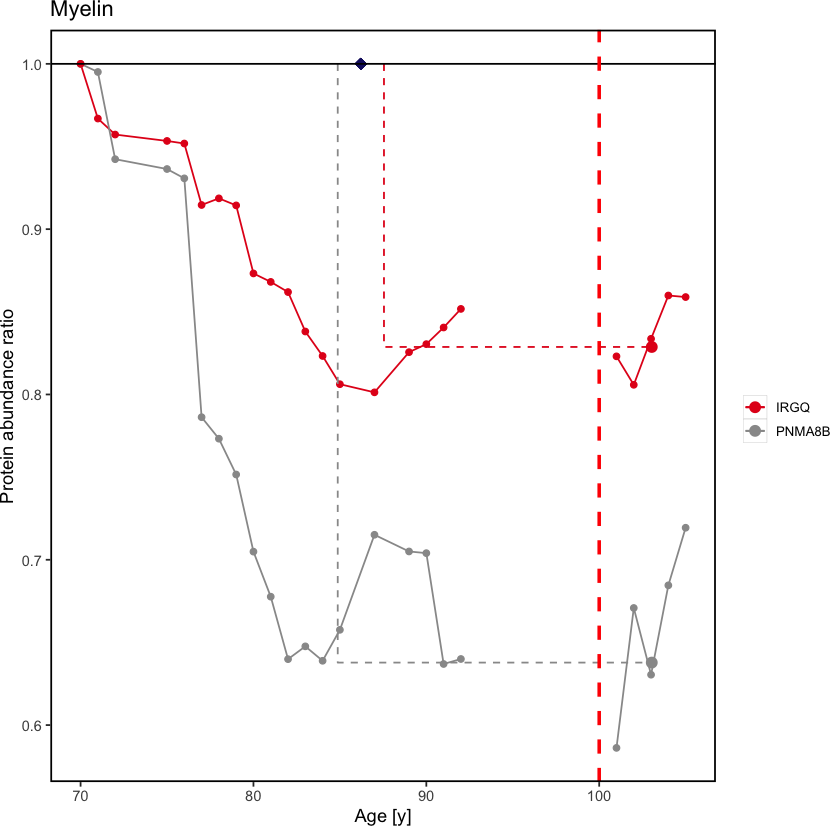

In [219]:
p

In [123]:
add_AB_mark_after_protein <- function(protein_list){
    protein_disp <- NULL
    for(i in protein_list){
        if (i %in% Braak_sig_proteins){
            if (i %in% Age_sig_proteins){
                protein_disp <- c(protein_disp, paste(i, "(A,B)"))
            }
            else{
                protein_disp <- c(protein_disp, paste(i, "(B)"))
            }
            
        }else{
            if (i %in% Age_sig_proteins){
                protein_disp <- c(protein_disp, paste(i, "(A)"))
            }
            else{
                protein_disp <- c(protein_disp, i)
            }
        }
    }
    return(protein_disp)
}

### Read annotation from Henne

In [124]:
Annotation_HH <- read_excel("R_workstation/Centenarian_specific_protemoics_data_analysis_archive/Data_file/Cen_Age and Cen-Braak Annotated_v2.xlsx",
                       sheet=1,col_names=TRUE, na="NA")

New names:
• `` -> `...1`
• `` -> `...6`
• `` -> `...7`
• `` -> `...8`
• `` -> `...9`

In [125]:
Annotation_HH <- Annotation_HH[,c(1, 2)]

In [126]:
colnames(Annotation_HH) <- c("sig", "protein")

In [127]:
Annotation_HH <- subset(Annotation_HH, !(is.na(sig) & is.na(protein)))

In [128]:
Annotation_HH

sig,protein
<chr>,<chr>
NA,Proteasome
AGE,CCT3
AGE,CCT6A;CCT6B
AGE,CCT6A
AGE,CCT6B
AGE,DNAJB1;DNAJB4
AGE,PDIA6
BRAAK,HSPB1
BRAAK,STIP1


In [129]:
break_idx <- which(is.na(Annotation_HH$sig))

In [130]:
break_idx <- c(break_idx, nrow(Annotation_HH))

In [131]:
break_idx

[1]   1  16  33  38  42  46  63  67  71  75 112 131 137 155 166 170 173 176 188
[20] 191

In [132]:
table(Annotation_HH$sig, useNA = "ifany")


  AGE BRAAK  <NA> 
  108    64    19 

In [133]:
age_group <- list()
braak_group <- list()

In [134]:
for(i in 1:(length(break_idx) - 1)){
    sub_ann <- Annotation_HH[(break_idx[i] + 1):break_idx[i+1], ]
    #print(sub_ann)
    if("AGE" %in% sub_ann$sig){
        age_group[[Annotation_HH[break_idx[i], ]$protein]] <- subset(sub_ann, sig == "AGE")$protein
    }
    if("BRAAK" %in% sub_ann$sig){
        braak_group[[Annotation_HH[break_idx[i], ]$protein]] <- subset(sub_ann, sig == "BRAAK")$protein
    }
}

In [135]:
age_group

$Proteasome
 [1] "CCT3"          "CCT6A;CCT6B"   "CCT6A"         "CCT6B"        
 [5] "DNAJB1;DNAJB4" "PDIA6"         "SSB"           "CAND1;CAND2"  
 [9] "USP7"          "USP11"        

$Trafficking
 [1] "ANXA11"                             "AP3B1"                             
 [3] "CHMP1A"                             "CHMP4B"                            
 [5] "DYNC1I1"                            "GGA3"                              
 [7] "RAB11A;RAB11B"                      "RUFY3"                             
 [9] "SNX5"                               "SNX9"                              
[11] "STX5"                               "SYPL1"                             
[13] "UBAP2L"                             "WASH2P;WASH3P;WASH4P;WASH6P;WASHC1"

$`Hormone metabolism`
[1] "PCSK1"  "OGFRL1" "PTGES2"

$Myelin
[1] "MAG"  "MOG"  "ANLN"

$Immunity
[1] "C2;CFB"   "ILF2"     "LGALS3BP"

$`Overall signal transduction`
 [1] "CSNK2A1;CSNK2A3" "GNA13"           "MAP3K5"          "PDE1A;PDE1C"    
 [5] "PLEKHB1"         "PNCK"            "RALA"            "RHOG"           
 [9] "RRAGC;RRAGD"     "TPD52L1"         "CACNA1E"         "PIP4K2A;PIP4K2B"
[13] "PDPK1;PDPK2P"   

$`Cellular homeostasis`
[1] "GSTK1" "PON2" 

$`Histones/nucleosomes`
[1] "DIP2A;DIP2C" "H1FX"        "NAP1L1"     

$`Cell cycle`
[1] "LZTS1" "CDK1"  "NUMA1"

$Cytoskeleton
 [1] "PTK2B"                  "CIT"                    "ABLIM1"                
 [4] "NCKAP1;NCKAP1L"         "ARHGAP23"               "CNTN1"                 
 [7] "ALCAM"                  "ITGB4"                  "MCAM"                  
[10] "MAP1A;MAP1B"            "TUBB"                   "TUBB3;TUBB4A;TUBB4B"   
[13] "TUBB3;TUBB6"            "TUBB4A;TUBB4B;TUBB8"    "TUBB4A"                
[16] "CNP"                    "INA;NEFH;NEFL;NEFM;VIM" "INA"                   
[19] "MAP1B"                  "NEFL"                   "NEFM"                  

$Synaptic
[1] "SCN2A"  "SHANK2" "IGSF21" "LRRC4B" "RIMBP2" "NCDN"  

$`Lipid metabolism`
[1] "GLTP" "PSD3"

$Metabolism
[1] "SIRT2"   "SHMT2"   "AMPD2"   "CARNS1"  "HADHA"   "NDUFAF4" "AK3"    

$Ribosome
[1] "RPL31"           "RPS13"           "RPS16"           "RPS3"           
[5] "RPS6KA2"         "RPS6KA2;RPS6KA3" "RPSA"           

$RNA
[1] "CSDE1"

$`Cell polarity`
[1] "RAP1A;RAP1B"

$`Choline metabolism`
[1] "SLC44A1" "ENPP6"  

$`OTHER (including very interesting proteins)`
[1] "FAM169A" "PIGK"    "CD9"     "TPBG"    "WRN"    

$`Function unknown`
[1] "PNMA8B" "IRGQ"

In [136]:
braak_group

$Proteasome
[1] "HSPB1"  "STIP1"  "ENO1"   "TRIM36"

$Trafficking
[1] "PEX5L" "STX17"

$`Hormone metabolism`
[1] "PCSK1"

$`Overall signal transduction`
[1] "GRB2"   "MAPK15" "PRKCE" 

$`Cellular homeostasis`
[1] "CSRP1"

$Cytoskeleton
 [1] "CRK"               "PHACTR1"           "CAP2"             
 [4] "LASP1"             "ACTN1;ACTN2;ACTN3" "ACTN2"            
 [7] "ACTN2;ACTN3"       "CNN3"              "EZR"              
[10] "FHL1"              "CADM3"             "CEP170B"          
[13] "MAPT"              "NFS1"              "NSFL1C"           

$Synaptic
 [1] "VGF"         "NGEF"        "CASKIN1"     "SYT12"       "SNAP25"     
 [6] "STX1A"       "ARRB1"       "NECAB1"      "CALB1;CALB2" "MLC1"       
[11] "OLFM1"       "OLFM3"      

$`Lipid metabolism`
[1] "APOO"   "LPCAT4" "PEA15" 

$Metabolism
 [1] "PNPO"    "PMM1"    "BDH2"    "PYGM"    "PDHB"    "PDK3"    "SLC25A5"
 [8] "VDAC1"   "TMEM65"  "COX4I1" 

$Ribosome
[1] "RNH1"                 "RPH3A"                "RPS27A;UBA52;UBB;UBC"

$RNA
[1] "RAN"         "RBMX;RBMXL1"

$`Cell polarity`
[1] "SCRN1"

$`OTHER (including very interesting proteins)`
[1] "SERPINB1;SERPINB9" "SERPINB6"          "SLC4A10"          
[4] "CTSB"              "FUBP1;FUBP3"       "KIAA1586"         

$`Function unknown`
[1] "C2CD4C"

In [72]:
title_size <- 13

In [73]:
plot_list_age <- NULL
index <- 1

In [62]:
for(i in 1:length(age_group)){
    protein_list <- age_group[[i]]
    title <- names(age_group)[i]

    protein_disp <- protein_list 
    
    #Braak_res_df <- generate_Braak_protein_df(Chap_protein_list, protein_disp)
    #Braak_res_CHCdf <- generate_Braak_protein_CHCdf(Chap_protein_list, protein_disp, Braak_res_df$exps_at_stage_NDAD)
    age_res_df <- generate_age_protein_df(protein_list, protein_disp)
    
    ymin <- age_res_df$ylim1
    ymax <- age_res_df$ylim2
    
    #plot_list[[names(age_group)[1]]] <- make_Braak_plot(protein_disp, title, Braak_res_df$plot_df, Braak_res_df$order_idx, 
    #                                       Braak_res_df$is_sig_linet, Braak_res_df$is_sig_alpha, ymin, ymax)
    #plot_list_CHC[[names(age_group)[1]]] <- make_Braak_CHCplot(protein_disp, title, Braak_res_CHCdf$plot_df, Braak_res_df$order_idx, 
    #                                       Braak_res_CHCdf$is_sig_linet, Braak_res_CHCdf$is_sig_alpha, ymin, ymax)
    plot_list_age[[names(age_group)[i]]] <- make_age_plot(protein_disp, title, age_res_df$plot_df, age_res_df$order_idx, 
                                           age_res_df$is_sig_linet, age_res_df$is_sig_alpha, ymin, ymax)
    
}

In [74]:
for(i in 1:length(age_group)){
    protein_list <- age_group[[i]]
    title <- names(age_group)[i]
    print(title)

    protein_disp <- protein_list 
    
    #Braak_res_df <- generate_Braak_protein_df(Chap_protein_list, protein_disp)
    #Braak_res_CHCdf <- generate_Braak_protein_CHCdf(Chap_protein_list, protein_disp, Braak_res_df$exps_at_stage_NDAD)
    age_res_df <- generate_age_protein_df_detailed_annotation(protein_list, protein_disp)
    
    print(age_res_df$centerpoint)
    centerpoint <- age_res_df$centerpoint
    
    ymin <- age_res_df$ylim1
    ymax <- age_res_df$ylim2
    
    #plot_list[[names(age_group)[1]]] <- make_Braak_plot(protein_disp, title, Braak_res_df$plot_df, Braak_res_df$order_idx, 
    #                                       Braak_res_df$is_sig_linet, Braak_res_df$is_sig_alpha, ymin, ymax)
    #plot_list_CHC[[names(age_group)[1]]] <- make_Braak_CHCplot(protein_disp, title, Braak_res_CHCdf$plot_df, Braak_res_df$order_idx, 
    #                                       Braak_res_CHCdf$is_sig_linet, Braak_res_CHCdf$is_sig_alpha, ymin, ymax)
    plot_list_age[[names(age_group)[i]]] <- make_age_plot_detailed_annotation(protein_disp, title, age_res_df$plot_df, 
                                                          age_res_df$order_idx, age_res_df$anno_df, 
                                                          centerpoint, age_res_df$CEN_mean,
                                                                              age_res_df$is_sig_linet, 
                                                          age_res_df$is_sig_alpha, ymin, ymax)
    
}

[1] "Synaptic"
[1] 84.23529  1.00000
[1] 84.23529  1.00000
[1] "Cytoskeleton"
[1] 76.81731  1.00000
[1] 76.81731  1.00000
[1] "Metabolism"
[1] 87.55  1.00
[1] 87.55  1.00
[1] "Proteasome"
[1] 76.25  1.00
[1] 76.25  1.00
[1] "Tric complex"
[1] 76.81731  1.00000
[1] 76.81731  1.00000
[1] "Signal transduction"
[1] 83.9375  1.0000
[1] 83.9375  1.0000
[1] "Lipid metabolism"
[1] 87.38235  1.00000
[1] 87.38235  1.00000
[1] "Microtubules"
[1] 80.5  1.0
[1] 80.5  1.0
[1] "Neurofilament"
[1] 89.84783  1.00000
[1] 89.84783  1.00000
[1] "RNA"
[1] 90.69565  1.00000
[1] 90.69565  1.00000
[1] "Ubiquitin"
[1] 79.53333  1.00000
[1] 79.53333  1.00000
[1] "Trafficking"
[1] 80.8  1.0
[1] 80.8  1.0
[1] "Hormone metabolism"
[1] 90.91667  1.00000
[1] 90.91667  1.00000
[1] "Cellular homeostasis"
[1] 85.11449  1.00000
[1] 85.11449  1.00000
[1] "Ribosome"
[1] 89.82609  1.00000
[1] 89.82609  1.00000
[1] "Cell polarity"
[1] 82.70588  1.00000
[1] 82.70588  1.00000
[1] "Cell adhesion"
[1] 87.55  1.00
[1] 87.55  1.0

In [75]:
group_age_plot <- plot_grid(plotlist = plot_list_age, ncol = 3, label_size = 15,
                        labels = LETTERS[1:length(plot_list_age)], hjust = -1.5, vjust = 1,
                        align = "hv", axis = "tblr")

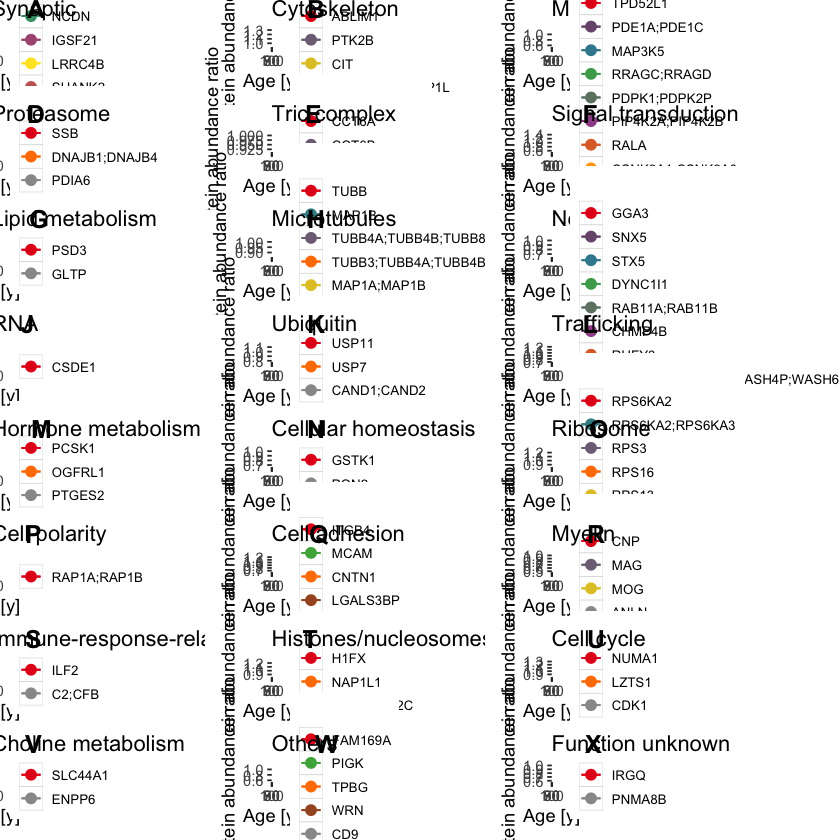

In [76]:
group_age_plot

In [77]:
save_plot("100_plus_plots/proteomics/protein_group/Protein_group_CEN_Age_extra_annotation_20240724.pdf", 
          group_age_plot, base_height = 24, base_width = 20)

In [114]:
plot_list <- NULL
plot_list_CHC <- NULL
group_list <- NULL

In [115]:
rel_width_fract <- c(0.39, 0.39, 0.22)
rel_height_fract <- c(0.08, 0.92)

In [116]:
for(i in 1:length(braak_group)){
#i = 1
    protein_list <- braak_group[[i]]
    title <- names(braak_group)[i]

    protein_disp <- protein_list 
    
    Braak_res_df <- generate_Braak_protein_df(protein_list, protein_disp)
    Braak_res_CHCdf <- generate_Braak_protein_CHCdf(protein_list, protein_disp, Braak_res_df$exps_at_stage_NDAD)
    #age_res_df <- generate_age_protein_df(Chap_protein_list, protein_disp)
    
    ymin <- min(Braak_res_df$ylim1, Braak_res_CHCdf$ylim1)
    ymax <- max(Braak_res_df$ylim2, Braak_res_CHCdf$ylim2)
    
    plot_list[[names(braak_group)[i]]] <- make_Braak_plot(protein_disp, title, Braak_res_df$plot_df, Braak_res_df$order_idx, 
                                           Braak_res_df$is_sig_linet, Braak_res_df$is_sig_alpha, ymin, ymax)
    plot_list_CHC[[names(braak_group)[i]]] <- make_Braak_CHCplot(protein_disp, title, Braak_res_CHCdf$plot_df, Braak_res_df$order_idx, 
                                           Braak_res_CHCdf$is_sig_linet, Braak_res_CHCdf$is_sig_alpha, ymin, ymax)
    
    legend1 <- get_legend(plot_list[[title]])
    #legend2 <- get_legend(plot_list_age[["CHAP"]])
    title_label <- ggdraw() + 
      draw_label(
        title,
        fontface = 'bold',
        size = title_size,
        hjust = 0.5
      )
    
    group_list[[title]] <- plot_grid(
        title_label, 
        plot_grid(plot_list[[title]] + theme(legend.position = "none"),
              plot_list_CHC[[title]] + theme(legend.position = "none"), 
              #plot_list_age[[title]] + theme(legend.position = "none"), 
                  legend1,
              label_size = 12, labels = c(paste(LETTERS[i], 1:2, sep="."), ""), hjust = 0, vjust = 1,
              ncol = 3, rel_widths = rel_width_fract, align = "h", axis = "lrtb"), 
        ncol = 1,
        rel_heights = rel_height_fract)
    
}

In [117]:
group_plot_merge_CEN_Braak <- plot_grid(plotlist = group_list, ncol = 2, #label_size = 12,
                        #labels = labels, hjust = -0.6, vjust = 1.1,
                        align = "hv", axis = "tl")

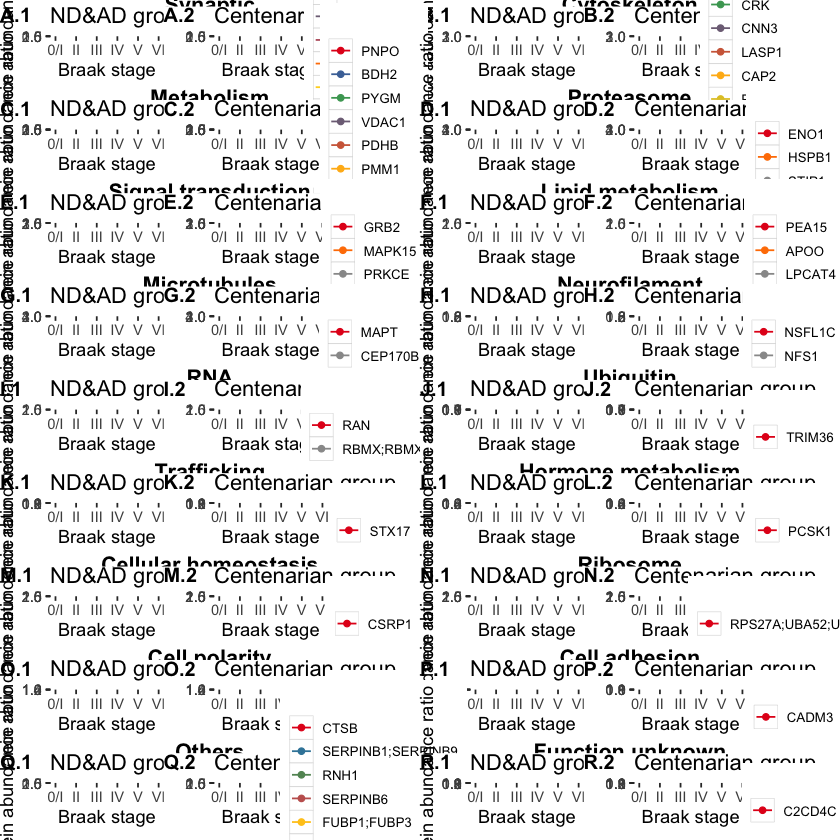

In [118]:
group_plot_merge_CEN_Braak

In [119]:
save_plot("100_plus_plots/proteomics/protein_group/Protein_group_CEN_Braak_Guus_20230422.pdf", 
          group_plot_merge_CEN_Braak, base_height = 25, base_width = 15)

### Read annotation from Henne

### Read annotation from Guus

In [77]:
Annotation_Guus_Braak <- read_excel("R_workstation/Centenarian_specific_protemoics_data_analysis_archive/Data_file/Cen_Age and Cen-Braak Annotated_ABS_update.xlsx",
                       sheet=1,col_names=TRUE, na="NA")

New names:
• `` -> `...1`

In [78]:
Annotation_Guus_Braak <- Annotation_Guus_Braak[,c(1, 2)]
colnames(Annotation_Guus_Braak) <- c("sig", "protein")
Annotation_Guus_Braak <- subset(Annotation_Guus_Braak, !(is.na(sig) & is.na(protein)))

In [79]:
#Annotation_Guus_Braak

In [80]:
break_idx <- which(is.na(Annotation_Guus_Braak$sig))
break_idx <- c(break_idx, nrow(Annotation_Guus_Braak))

In [81]:
break_idx

[1]  1  5  7  9 11 12 13 17 19 20 21 32 35 38 52 56 67 69 72 74 75 84 86 87

In [82]:
table(Annotation_Guus_Braak$sig, useNA = "ifany")


BRAAK  <NA> 
   64    23 

In [100]:
braak_group <- list()

In [101]:
for(i in 1:(length(break_idx) - 1)){
    sub_ann <- Annotation_Guus_Braak[(break_idx[i] + 1):break_idx[i+1], ]
    if("BRAAK" %in% sub_ann$sig){
        braak_group[[Annotation_Guus_Braak[break_idx[i], ]$protein]] <- subset(sub_ann, sig == "BRAAK")$protein
    }
}

In [102]:
protein_num <- sapply(braak_group, length)

In [103]:
braak_group

$Proteasome
[1] "HSPB1" "STIP1" "ENO1" 

$ubiquitin
[1] "TRIM36"

$trafficking
[1] "STX17"

$`hormone metabolism`
[1] "PCSK1"

$`signal transduction`
[1] "GRB2"   "MAPK15" "PRKCE" 

$`cellular homeostasis`
[1] "CSRP1"

$cytoskeleton
 [1] "CRK"               "PHACTR1"           "CAP2"             
 [4] "LASP1"             "ACTN1;ACTN2;ACTN3" "ACTN2"            
 [7] "ACTN2;ACTN3"       "CNN3"              "EZR"              
[10] "FHL1"             

$Microtubules
[1] "CEP170B" "MAPT"   

$Neurofilament
[1] "NFS1"   "NSFL1C"

$synaptic
 [1] "VGF"         "NGEF"        "CASKIN1"     "SYT12"       "SNAP25"     
 [6] "STX1A"       "ARRB1"       "RPH3A"       "NECAB1"      "CALB1;CALB2"
[11] "MLC1"        "OLFM1"       "OLFM3"      

$`lipid metabolism`
[1] "APOO"   "LPCAT4" "PEA15" 

$metabolism
 [1] "PNPO"    "PMM1"    "BDH2"    "PYGM"    "PDHB"    "PDK3"    "SLC25A5"
 [8] "VDAC1"   "TMEM65"  "COX4I1" 

$ribosome
[1] "RPS27A;UBA52;UBB;UBC"

$RNA
[1] "RAN"         "RBMX;RBMXL1"

$`cell polarity`
[1] "SCRN1"

$`OTHER (including very interesting proteins)`
[1] "SERPINB1;SERPINB9" "SERPINB6"          "SLC4A10"          
[4] "CTSB"              "FUBP1;FUBP3"       "KIAA1586"         
[7] "PEX5L"             "RNH1"             

$`function unknown`
[1] "C2CD4C"

$`Cell adhesion`
[1] "CADM3"

In [104]:
order(protein_num, decreasing = TRUE)

[1] 10  7 12 16  1  5 11  8  9 14  2  3  4  6 13 15 17 18

In [105]:
group_order <- c(10, 7, 12, 1, 5, 11, 8 ,9, 14, 2, 3, 4, 6, 13, 15, 18, 16, 17)

In [106]:
braak_group <- braak_group[group_order]

In [107]:
#ordered_names_braak <- names(braak_group)
names(braak_group)

[1] "synaptic"                                   
 [2] "cytoskeleton"                               
 [3] "metabolism"                                 
 [4] "Proteasome"                                 
 [5] "signal transduction"                        
 [6] "lipid metabolism"                           
 [7] "Microtubules"                               
 [8] "Neurofilament"                              
 [9] "RNA"                                        
[10] "ubiquitin"                                  
[11] "trafficking"                                
[12] "hormone metabolism"                         
[13] "cellular homeostasis"                       
[14] "ribosome"                                   
[15] "cell polarity"                              
[16] "Cell adhesion"                              
[17] "OTHER (including very interesting proteins)"
[18] "function unknown"

In [108]:
names(braak_group) <- c('Synaptic', 'Cytoskeleton', 'Metabolism', 'Proteasome', 'Signal transduction',
                        'Lipid metabolism', 'Microtubules', 'Neurofilament', 'RNA', 'Ubiquitin', 
                        'Trafficking', 'Hormone metabolism', 'Cellular homeostasis', 'Ribosome', 
                        'Cell polarity', 'Cell adhesion', 'Others', 'Function unknown')

In [109]:
braak_group

$Synaptic
 [1] "VGF"         "NGEF"        "CASKIN1"     "SYT12"       "SNAP25"     
 [6] "STX1A"       "ARRB1"       "RPH3A"       "NECAB1"      "CALB1;CALB2"
[11] "MLC1"        "OLFM1"       "OLFM3"      

$Cytoskeleton
 [1] "CRK"               "PHACTR1"           "CAP2"             
 [4] "LASP1"             "ACTN1;ACTN2;ACTN3" "ACTN2"            
 [7] "ACTN2;ACTN3"       "CNN3"              "EZR"              
[10] "FHL1"             

$Metabolism
 [1] "PNPO"    "PMM1"    "BDH2"    "PYGM"    "PDHB"    "PDK3"    "SLC25A5"
 [8] "VDAC1"   "TMEM65"  "COX4I1" 

$Proteasome
[1] "HSPB1" "STIP1" "ENO1" 

$`Signal transduction`
[1] "GRB2"   "MAPK15" "PRKCE" 

$`Lipid metabolism`
[1] "APOO"   "LPCAT4" "PEA15" 

$Microtubules
[1] "CEP170B" "MAPT"   

$Neurofilament
[1] "NFS1"   "NSFL1C"

$RNA
[1] "RAN"         "RBMX;RBMXL1"

$Ubiquitin
[1] "TRIM36"

$Trafficking
[1] "STX17"

$`Hormone metabolism`
[1] "PCSK1"

$`Cellular homeostasis`
[1] "CSRP1"

$Ribosome
[1] "RPS27A;UBA52;UBB;UBC"

$`Cell polarity`
[1] "SCRN1"

$`Cell adhesion`
[1] "CADM3"

$Others
[1] "SERPINB1;SERPINB9" "SERPINB6"          "SLC4A10"          
[4] "CTSB"              "FUBP1;FUBP3"       "KIAA1586"         
[7] "PEX5L"             "RNH1"             

$`Function unknown`
[1] "C2CD4C"

In [30]:
Annotation_Guus_Age <- read_excel("R_workstation/Centenarian_specific_protemoics_data_analysis_archive/Data_file/Cen_Age and Cen-Braak Annotated_ABS_update.xlsx",
                       sheet=2,col_names=TRUE, na="NA")

New names:
• `` -> `...1`

In [31]:
Annotation_Guus_Age <- Annotation_Guus_Age[,c(1, 2)]
colnames(Annotation_Guus_Age) <- c("sig", "protein")
Annotation_Guus_Age <- subset(Annotation_Guus_Age, !(is.na(sig) & is.na(protein)))

In [32]:
#Annotation_Guus_Age

In [33]:
break_idx <- which(is.na(Annotation_Guus_Age$sig))
break_idx <- c(break_idx, nrow(Annotation_Guus_Age))

In [34]:
#break_idx

In [35]:
table(Annotation_Guus_Age$sig, useNA = "ifany")


 AGE <NA> 
 108   24 

In [36]:
age_group <- list()

In [37]:
for(i in 1:(length(break_idx) - 1)){
    sub_ann <- Annotation_Guus_Age[(break_idx[i] + 1):break_idx[i+1], ]
    #print(sub_ann)
    if("AGE" %in% sub_ann$sig){
        age_group[[Annotation_Guus_Age[break_idx[i], ]$protein]] <- subset(sub_ann, sig == "AGE")$protein
    }
}

In [38]:
length(age_group)

[1] 24

In [39]:
c('Synaptic', 'Cytoskeleton', 'Metabolism', 'Proteasome', 'Signal transduction',
'Lipid metabolism', 'Microtubules', 'Neurofilament', 'RNA', 'Ubiquitin', 
'Trafficking', 'Hormone metabolism', 'Cellular homeostasis', 'Ribosome', 
'Cell polarity', 'Cell adhesion', 'Others', 'Function unknown')

[1] "Synaptic"             "Cytoskeleton"         "Metabolism"          
 [4] "Proteasome"           "Signal transduction"  "Lipid metabolism"    
 [7] "Microtubules"         "Neurofilament"        "RNA"                 
[10] "Ubiquitin"            "Trafficking"          "Hormone metabolism"  
[13] "Cellular homeostasis" "Ribosome"             "Cell polarity"       
[16] "Cell adhesion"        "Others"               "Function unknown"

In [40]:
names(age_group)

[1] "Tric complex"                               
 [2] "Proteasome"                                 
 [3] "Ubiquitin"                                  
 [4] "trafficking"                                
 [5] "hormone metabolism"                         
 [6] "myelin"                                     
 [7] "immune-response-related"                    
 [8] "overall signal transduction"                
 [9] "cellular homeostasis"                       
[10] "histones/nucleosomes"                       
[11] "cell cycle"                                 
[12] "cytoskeleton"                               
[13] "Microtubules"                               
[14] "Neurofilament"                              
[15] "synaptic"                                   
[16] "lipid metabolism"                           
[17] "metabolism"                                 
[18] "ribosome"                                   
[19] "RNA"                                        
[20] "cell polarity"                              
[21] "choline metabolism"                         
[22] "OTHER (including very interesting proteins)"
[23] "function unknown"                           
[24] "Cell adhesion"

In [41]:
ordered_names_age <- c('synaptic', 'cytoskeleton', 'metabolism', 'Proteasome', 'Tric complex', 
                       'overall signal transduction', 'lipid metabolism', 'Microtubules',
                       'Neurofilament', 'RNA', 'Ubiquitin', 'trafficking', 
                       'hormone metabolism', 'cellular homeostasis', 'ribosome', 'cell polarity', 
                       'Cell adhesion', 'myelin', 'immune-response-related', 'histones/nucleosomes',
                       'cell cycle', 'choline metabolism', 
                       'OTHER (including very interesting proteins)', 'function unknown')

In [42]:
length(unique(ordered_names_age))

[1] 24

In [43]:
age_group <- age_group[ordered_names_age]

In [44]:
names(age_group) <- c('Synaptic', 'Cytoskeleton', 'Metabolism', 'Proteasome', 'Tric complex',
                      'Signal transduction', 'Lipid metabolism', 'Microtubules', 
                      'Neurofilament','RNA', 'Ubiquitin', 'Trafficking',
                      'Hormone metabolism', 'Cellular homeostasis', 'Ribosome', 'Cell polarity', 
                      'Cell adhesion', 'Myelin', 'Immune-response-related', 'Histones/nucleosomes',
                      'Cell cycle', 'Choline metabolism', 
                      'Others', 'Function unknown')

In [45]:
length(age_group)

[1] 24

### Read annotation from Guus

In [318]:
age_diff

protein,index,end_age,ND_age,CHC_age,younger,cen_specific
<fct>,<int>,<int>,<dbl>,<dbl>,<dbl>,<fct>
SLC12A2,1,100,92.17647,103.0408,10.86435,no
CARNS1,9,92,87.55000,103.0408,15.49082,yes
MAP1B,12,89,83.00000,103.0408,20.04082,yes
SLC16A1,1,100,92.17647,103.0408,10.86435,no
IRGQ,9,92,87.55000,103.0408,15.49082,yes
MTHFD1,6,95,89.82609,103.0408,13.21473,no
HSPA12A,2,99,91.70000,103.0408,11.34082,no
FLOT1,2,99,91.70000,103.0408,11.34082,no
KBTBD11,6,95,89.82609,103.0408,13.21473,no


In [320]:
for(i in 1:length(age_group)){
    print(names(age_group)[i])
    print(summary(subset(age_diff, protein %in% age_group[[i]])$younger))
}

[1] "Synaptic"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  12.35   14.85   18.81   18.84   21.76   26.79 
[1] "Cytoskeleton"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  20.33   24.33   26.22   25.21   27.10   28.04 
[1] "Metabolism"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  12.12   12.67   15.49   17.48   20.70   28.04 
[1] "Proteasome"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  14.04   20.42   26.79   22.54   26.79   26.79 
[1] "Tric complex"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  25.66   25.66   26.22   26.54   27.10   28.04 
[1] "Signal transduction"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  10.86   15.07   19.10   19.81   25.27   28.04 
[1] "Lipid metabolism"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  14.04   14.85   15.66   15.66   16.47   17.28 
[1] "Microtubules"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  20.04   21.29   22.54   22.84   23.97   26.79 
[1] "Neurofilament"
   Min. 1st Qu.  Median    Mean 3rd Qu.  

In [ ]:
Cell cycle

In [326]:
subset(age_diff, protein == "CIT")

,protein,index,end_age,ND_age,CHC_age,younger,cen_specific
,<fct>,<int>,<int>,<dbl>,<dbl>,<dbl>,<fct>
16,CIT,19,82,77.38462,103.0408,25.6562,yes
